<a href="https://colab.research.google.com/github/afiarodoshe/EEG-data-practice/blob/main/UPenn_and_Mayo_Clinic's_Seizure_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [3]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c seizure-detection

100% 10.1G/10.1G [02:04<00:00, 77.5MB/s]
100% 10.1G/10.1G [02:04<00:00, 86.8MB/s]


In [9]:
!tar xvzf clips.tar.gz Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/

Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_1.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_10.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_11.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_12.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_13.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_14.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_15.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_16.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_17.mat
Volumes/Seagate/seizure_detection/competition_data/

In [8]:
! unzip seizure-detection

Archive:  seizure-detection.zip
  inflating: clips.tar.gz            
  inflating: sampleSubmission.csv    
  inflating: sample_clip.mat.gz      


In [10]:
!ls

clips.tar.gz  kaggle.json	  sample_data		seizure-detection.zip
drive	      sample_clip.mat.gz  sampleSubmission.csv	Volumes


In [12]:
upenn_ictal_list = []
upenn_interictal_list = []

UPENN_P1_DATA_DIR = !ls Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/
upenn_P1_file_list = [file.strip() for file in UPENN_P1_DATA_DIR]

for file in upenn_P1_file_list:
  if re.findall('interictal', file):
    upenn_interictal_list.append(file)
  elif re.findall('ictal', file):
    upenn_ictal_list.append(file)

upenn_seizure_file = upenn_ictal_list[1]
upenn_baseline_file = upenn_interictal_list[1]

NameError: name 're' is not defined

In [13]:
upenn_ictal_list = []
upenn_interictal_list = []

# Use the python os module instead of a shell command to get the file list
import os
UPENN_P1_DATA_DIR = os.listdir('Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/')
upenn_P1_file_list = [file.strip() for file in UPENN_P1_DATA_DIR]

for file in upenn_P1_file_list:
  if 'interictal' in file: # Use the 'in' operator to check if substring is present
    upenn_interictal_list.append(file)
  elif 'ictal' in file:
    upenn_ictal_list.append(file)

upenn_seizure_file = upenn_ictal_list[1]
upenn_baseline_file = upenn_interictal_list[1]

# Construct the full file path
upenn_seizure_file_path = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/' + upenn_seizure_file

from scipy.io import loadmat

# Load the .mat file using the full file path
mat = loadmat(upenn_seizure_file_path)
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: unix, Software: R v3.0.2, Created on: Mon Apr  7 22:21:33 2014',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[  95.502,  105.502,  144.502, ..., -189.498, -147.498, -138.498],
        [-556.016, -564.016, -545.016, ...,  451.984,  455.984,  440.984],
        [-646.604, -599.604, -562.604, ...,  434.396,  424.396,  397.396],
        ...,
        [-349.38 , -325.38 , -288.38 , ..., -645.38 , -628.38 , -598.38 ],
        [ 302.326,  335.326,  352.326, ..., -923.674, -891.674, -892.674],
        [-243.286, -225.286, -218.286, ..., -305.286, -272.286, -224.286]]),
 'freq': array([499.906994]),
 'channels': array([[(array(['LFG1'], dtype='<U4'), array(['LFG10'], dtype='<U5'), array(['LFG11'], dtype='<U5'), array(['LFG12'], dtype='<U5'), array(['LFG13'], dtype='<U5'), array(['LFG14'], dtype='<U5'), array(['LFG15'], dtype='<U5'), array(['LFG16'], dtype='<U5'), array(['LFG17'], dtype='<U5'), array(['LFG18'], dtype='<U5'), array(['LF

In [14]:
!pip install termcolor # Install the termcolor library to enable color formatting
from termcolor import colored

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat # Import loadmat

def mat_to_df(file_path, output = False):
  mat = loadmat(file_path)    # load mat-file

  data = mat['data']          # variable in mat file
  channels = mat['channels']  # dtypes of structures are "unsized objects"
  freq = mat['freq'][0]

  channels_list = []
  for channel_array in channels[0][0]:
    channels_list.append(channel_array[0])

  df = pd.DataFrame(data,
                    index=channels_list)

  df = df.T

  # remove columns that do not change value
  df = df.loc[:, (df != df.iloc[0]).any()]

  if output:
    display(df.head())

  return df, freq

# Construct the full file path for both files
upenn_seizure_file_path = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/' + upenn_seizure_file
upenn_baseline_file_path = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/' + upenn_baseline_file

# Use the colored function to format the output
print(colored('Ictal', 'white', 'on_grey', attrs=['bold', 'underline']))
# Pass the full file path to the mat_to_df function
upenn_seizure_df, upenn_seizure_freq = mat_to_df(upenn_seizure_file_path, output=True)
print()
print(colored('Interictal', 'white', 'on_grey', attrs=['bold', 'underline']))
# Pass the full file path to the mat_to_df function
upenn_baseline_df, upenn_baseline_freq = mat_to_df(upenn_baseline_file_path, output=True)

Ictal


LFG1    LFG10    LFG11    LFG12    LFG13    LFG14    LFG15   LFG16  \
0   95.502 -556.016 -646.604 -232.724 -391.434 -308.164 -752.992 -26.732   
1  105.502 -564.016 -599.604 -198.724 -353.434 -256.164 -727.992 -45.732   
2  144.502 -545.016 -562.604 -126.724 -273.434 -167.164 -663.992  10.268   
3  187.502 -550.016 -560.604 -119.724 -236.434 -168.164 -626.992  27.268   
4  179.502 -556.016 -578.604  -73.724 -218.434 -168.164 -621.992  41.268   

     LFG17    LFG18  ...    LFG62    LFG63    LFG64     LFG7    LFG8     LFG9  \
0  376.056 -323.046  ...  813.344   58.932 -187.438 -304.518  71.576   61.638   
1  353.056 -330.046  ...  773.344   60.932 -216.438 -292.518  41.576   77.638   
2  360.056 -377.046  ...  764.344   82.932 -192.438 -232.518  62.576  124.638   
3  348.056 -439.046  ...  780.344  129.932 -123.438 -240.518  47.576  147.638   
4  356.056 -477.046  ...  737.344  101.932 -127.438 -255.518  15.576  119.638   

      LFS1    LFS2     LFS3     LFS4  
0 -304.158 -349.38  302.326 -243.286  
1 -317.158 -325.38  335.326 -225.286  
2 -307.158 -288.38  352.326 -218.286  
3 -257.158 -229.38  354.326 -214.286  
4 -192.158 -175.38  316.326 -228.286  

[5 rows x 68 columns]


Interictal


LFG1   LFG10   LFG11    LFG12  LFG13    LFG14   LFG15    LFG16    LFG17  \
0  15.16  47.234 -26.202 -158.518 -232.2  238.576   3.872  -73.588  142.318   
1  11.16  53.234 -24.202 -148.518 -250.2  256.576 -19.128  -81.588  136.318   
2  27.16  57.234 -10.202 -140.518 -257.2  260.576 -53.128 -118.588  132.318   
3  46.16  63.234 -10.202 -110.518 -262.2  242.576 -77.128 -122.588  119.318   
4  62.16  90.234   2.798  -94.518 -253.2  198.576 -81.128 -108.588  123.318   

    LFG18  ...   LFG62   LFG63   LFG64    LFG7    LFG8    LFG9     LFS1  \
0  34.244  ... -34.682 -12.166 -98.114 -25.804  57.246   94.09  206.054   
1  49.244  ... -16.682   6.834 -90.114 -36.804  40.246  106.09  191.054   
2  63.244  ...  -4.682  18.834 -78.114 -46.804  22.246  107.09  181.054   
3  57.244  ...  10.318  34.834 -60.114 -50.804   3.246  104.09  167.054   
4  59.244  ...  45.318  57.834 -32.114 -67.804 -11.754   86.09  168.054   

     LFS2     LFS3     LFS4  
0 -50.406  116.328  376.832  
1 -42.406  125.328  345.832  
2 -59.406  126.328  322.832  
3 -83.406  112.328  310.832  
4 -83.406  108.328  303.832  

[5 rows x 68 columns]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.7 MB/s eta 0:00:00
Interictal


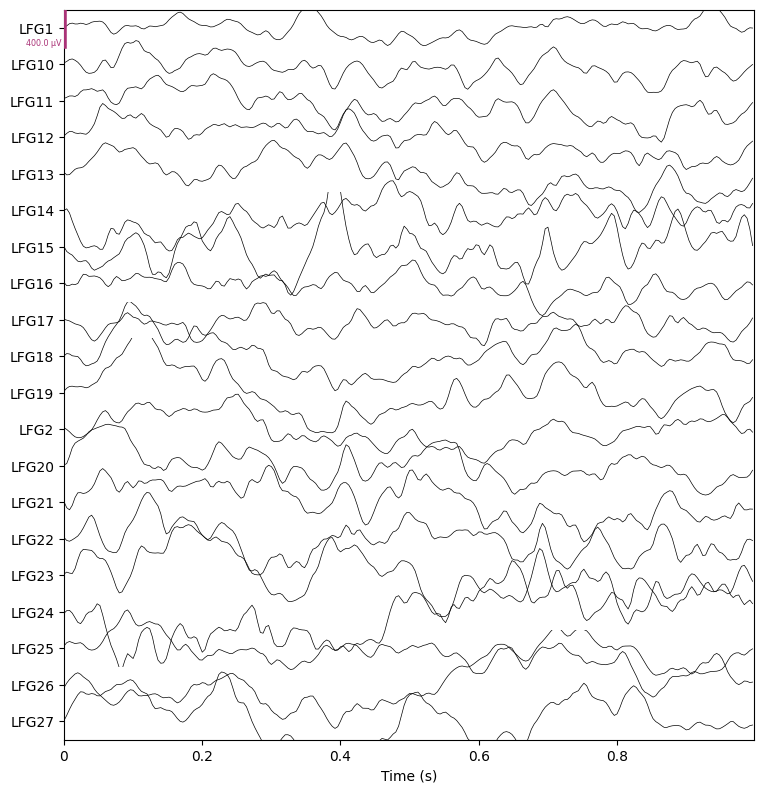


Ictal


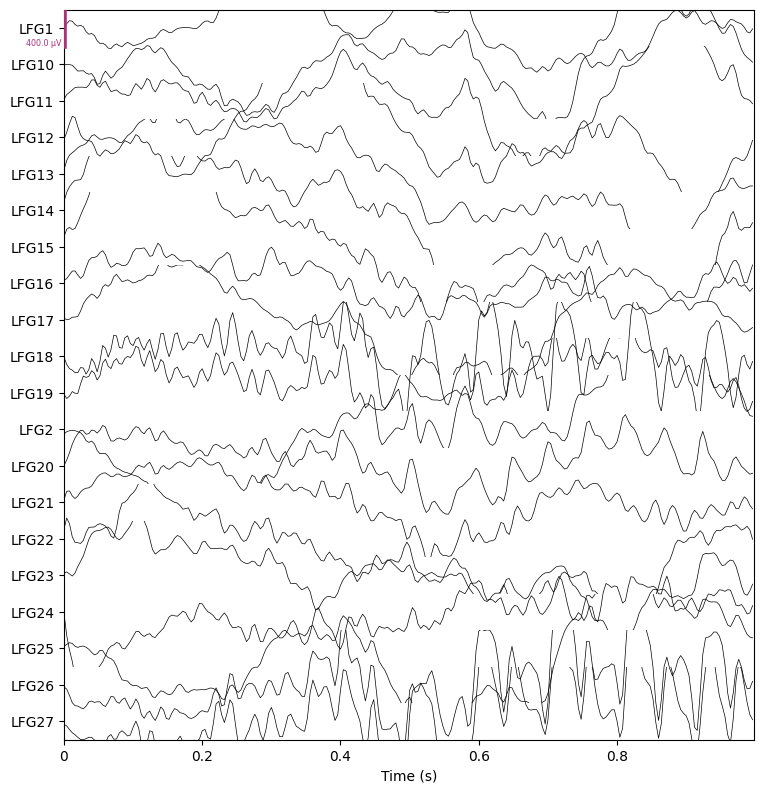

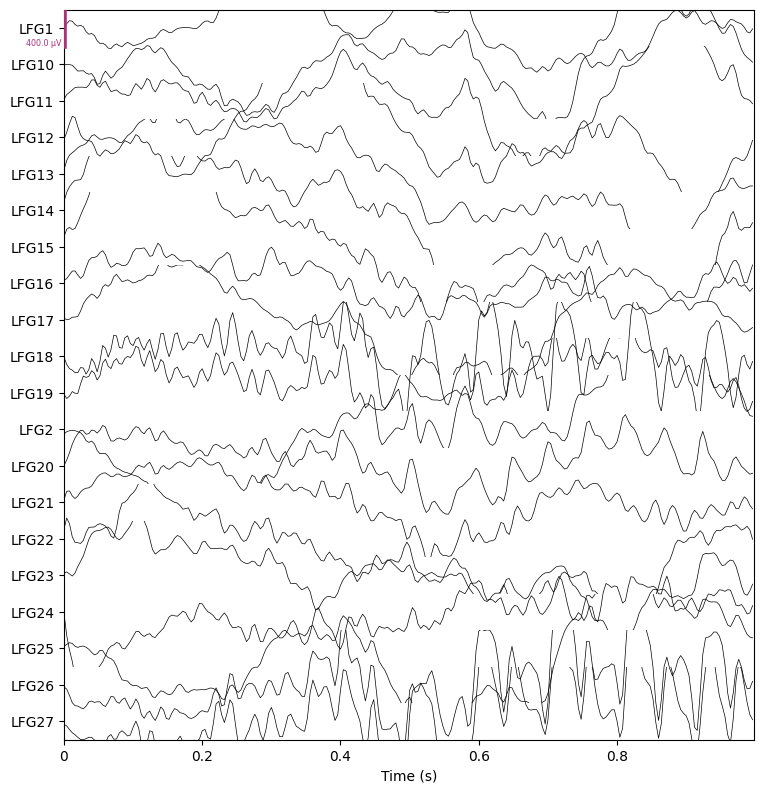

In [15]:
!pip install mne
import mne # Import the mne library

!pip install termcolor # Install the termcolor library to enable color formatting
from termcolor import colored

# set mne to only output warnings
mne.set_log_level('WARNING')

def mne_object(data, freq):
  # create an mne info file with meta data about the EEG
  info = mne.create_info(ch_names=list(data.columns),
                         sfreq=freq,
                         ch_types=['eeg']*data.shape[-1])

  # data needs to be in volts rather than in microvolts
  data = data.apply(lambda x: x*1e-6)
  # transpose the data
  data_T = data.transpose()

  # create raw mne object
  raw = mne.io.RawArray(data_T, info)

  return raw


plot_kwargs = {
    'scalings': dict(eeg=20e-5),   # zooms the plot out
    'highpass': 0.5,              # filters out low frequencies
    'lowpass': 70.,                # filters out high frequencies
    'show_scrollbars': False,
    'show': True
}

print(colored('Interictal', 'white', 'on_grey', attrs=['bold', 'underline'])) # Use colored function from termcolor
upenn_baseline_mne = mne_object(upenn_baseline_df, upenn_baseline_freq)
upenn_baseline_mne.plot(**plot_kwargs);
print()
print(colored('Ictal', 'white', 'on_grey', attrs=['bold', 'underline'])) # Use colored function from termcolor
upenn_seizure_mne = mne_object(upenn_seizure_df, upenn_seizure_freq)
upenn_seizure_mne.plot(**plot_kwargs)

Ictal


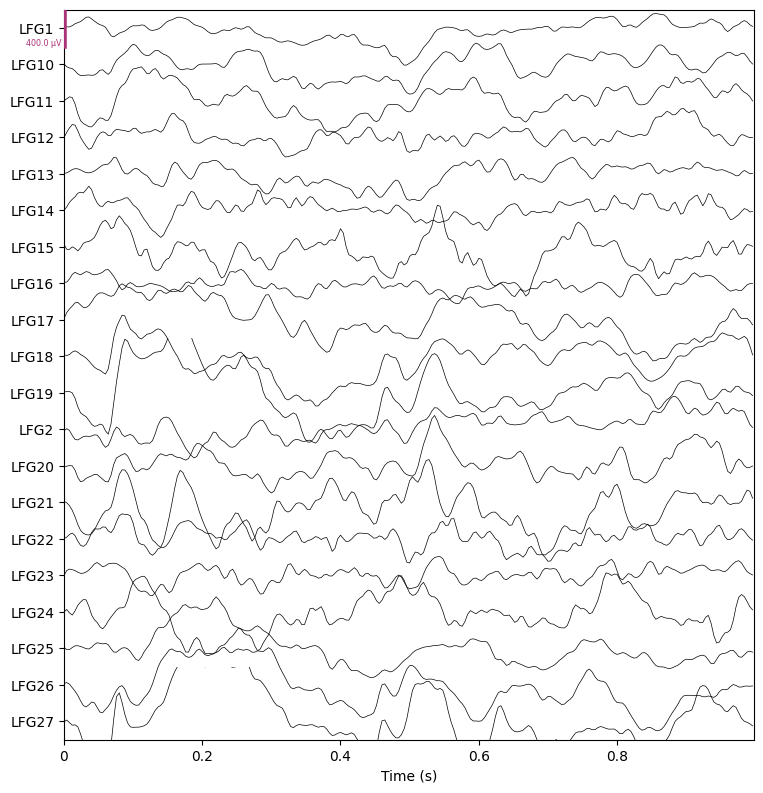

Interictal


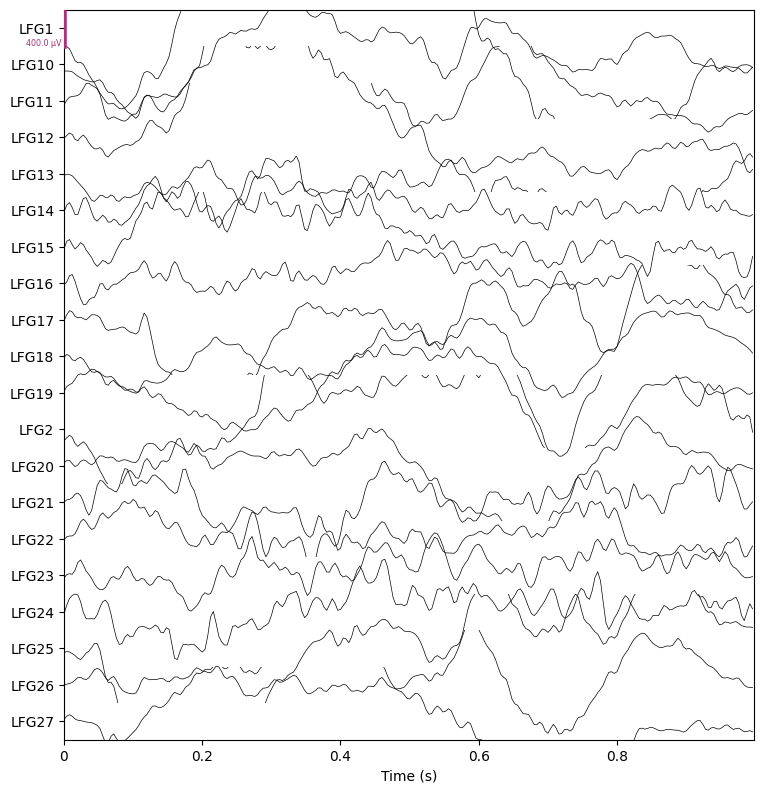

In [ ]:
!pip install mne
import mne # Import the mne library

!pip install termcolor # Install the termcolor library to enable color formatting
from termcolor import colored # Import the colored function from termcolor
import random # Import the random module

# set mne to only output warnings
mne.set_log_level('WARNING')

# Define the base directory path
base_dir = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/'

for i, sampled_files in enumerate([random.sample(upenn_interictal_list, 1),
                                   random.sample(upenn_ictal_list, 1)]):

  if i == 0:
    # Use the colored function from termcolor to format the output
    print(colored('Ictal', 'white', 'on_grey', attrs=['bold', 'underline']))
  else:
    # Use the colored function from termcolor to format the output
    print(colored('Interictal', 'white', 'on_grey', attrs=['bold', 'underline']))
  for file in sampled_files:
      # Construct the full file path by joining the base directory and filename
      full_file_path = os.path.join(base_dir, file)
      upenn_df, upenn_freq = mat_to_df(full_file_path) # Pass the full file path to mat_to_df
      upenn_mne = mne_object(upenn_df, upenn_freq)
      upenn_mne.plot(**plot_kwargs)

In [ ]:
!pip install matplotlib pandas numpy scipy seaborn mne
!pip install beautifulsoup4 requests wget
!pip install h5py tables kaggle
!pip install wfdb pyEDFlib PyWavelets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=b762acd1e1b91d6278a2c2cbcf6a347a0ca134105b7790e4c2ab15af8743227a
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 42.2 MB/s eta 0:00:00


In [ ]:
import glob            # for file locations
import pprint          # for pretty printing
import re

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

pp = pprint.PrettyPrinter()

def file_list(folder_path, output=False):
    # create an empty list
    file_list = []
    # for file name in the folder path...
    for filename in glob.glob(folder_path):
        # ... append it to the list
        file_list.append(filename)

    # sort alphabetically
    file_list.sort()

    # Output
    if output:
        print(str(len(file_list)) + " files found")
        pp.pprint(file_list)

    return file_list

In [ ]:
!pip install matplotlib pandas numpy scipy seaborn mne
!pip install beautifulsoup4 requests wget
!pip install h5py tables kaggle
!pip install wfdb pyEDFlib PyWavelets

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=8d35fa37797e09f31fdf151f58f956c922c6e5eb6db840e5120477ed09b97265
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 37.4 MB/s eta 0:00:00


In [ ]:
!from google.colab import files
!df.to_csv('output.csv', encoding = 'utf-8-sig')
!files.download('output.csv')

/bin/bash: line 1: from: command not found
/bin/bash: -c: line 1: syntax error near unexpected token `'output.csv','
/bin/bash: -c: line 1: `df.to_csv('output.csv', encoding = 'utf-8-sig')'
/bin/bash: -c: line 1: syntax error near unexpected token `'output.csv''
/bin/bash: -c: line 1: `files.download('output.csv')'


In [ ]:
import glob            # for file locations
import pprint          # for pretty printing
import re

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

pp = pprint.PrettyPrinter()

def file_list(folder_path, output=False):
    # create an empty list
    file_list = []
    # for file name in the folder path...
    for filename in glob.glob(folder_path):
        # ... append it to the list
        file_list.append(filename)

    # sort alphabetically
    file_list.sort()

    # Output
    if output:
        print(str(len(file_list)) + " files found")
        pp.pprint(file_list)

    return file_list

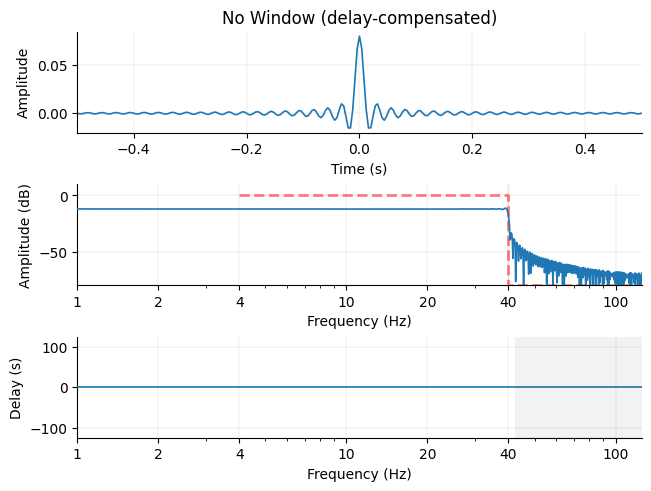

In [ ]:
from mne.viz import plot_filter, plot_ideal_filter
import matplotlib.pyplot as plt

sfreq = 250
f_p = 40.
nyq = sfreq / 2.  # the Nyquist frequency is half our sample rate
freq = [0, f_p, f_p, nyq]
gain = [1, 1, 0, 0]

n = int(round(1 * sfreq))
n -= n % 2 - 1  # make it odd
t = np.arange(-(n // 2), n // 2 + 1) / sfreq  # center our sinc
h = np.sinc(2 * f_p * t) / (4 * np.pi)
flim = (1., sfreq / 2.)
fig = plot_filter(h, sfreq, freq, gain, 'No Window', flim=flim, compensate=True)

textstr = '\n'.join((
    'Pass-band Frequency: '+str(f_p),
    'Filter Length: 1s'))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
fig.text(0.7, 0.9, textstr, fontsize=14, bbox=props)

plt.show()
fig.savefig('ringing_40hz.png')

<ipython-input-55-0b6f0b0f7a8a>:7: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  h = signal.firwin2(n, freq, gain, nyq=nyq)


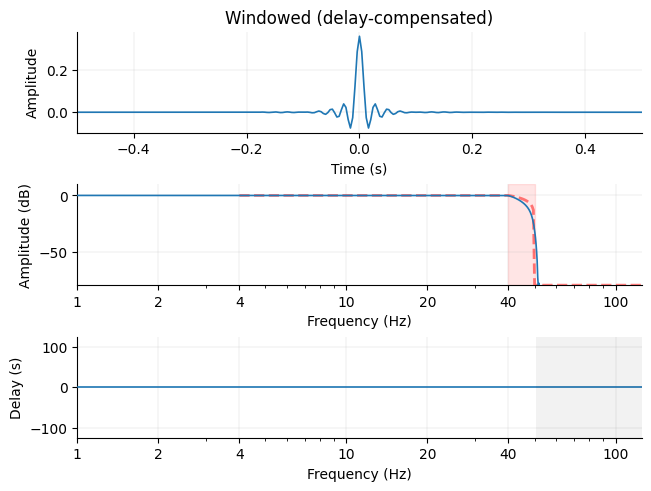

In [ ]:
from scipy import signal
trans_bandwidth = 10  # 10 Hz transition band
f_s = f_p + trans_bandwidth

freq = [0., f_p, f_s, nyq]
gain = [1., 1., 0., 0.]
h = signal.firwin2(n, freq, gain, nyq=nyq)
fig = plot_filter(h, sfreq, freq, gain, 'Windowed',
                  flim=flim, compensate=True)

textstr = '\n'.join((
    'Pass-band Frequency: '+str(f_p),
    'Filter Length: 1s',
    'Transition Bandwidth: '+str(trans_bandwidth)+' Hz'))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
fig.text(0.7, 0.88, textstr, fontsize=14, bbox=props)

plt.show()
fig.savefig('no_ringing_40hz.png')

In [16]:
from pywt import families

families(short=False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

In [17]:
from pywt import Wavelet

wavelet = Wavelet('Haar')
print(wavelet)

Wavelet haar
  Family name:    Haar
  Short name:     haar
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


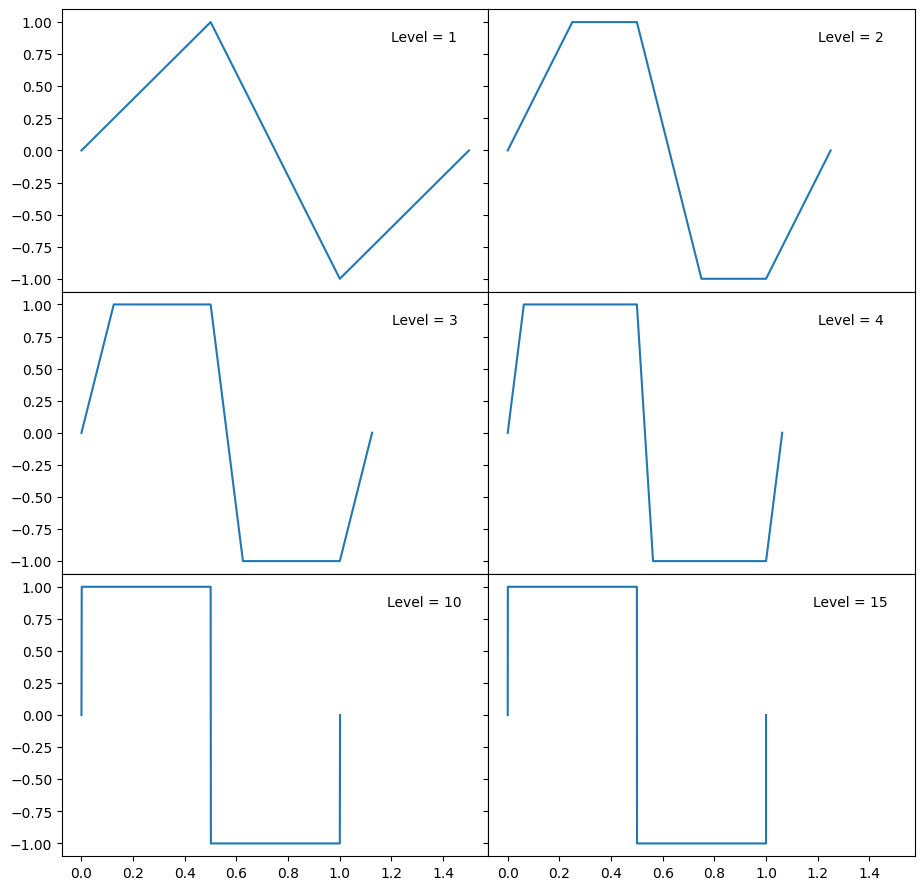

In [18]:
import matplotlib.pyplot as plt

def plot_wavelet(wavelet):

    fig, axs = plt.subplots(3,2, figsize=(11,11), squeeze =True, sharex=True, sharey=True)
    axs = axs.flatten()
    for i, level in enumerate([1, 2, 3, 4, 10, 15]):
        try:
            [psi, x] = wavelet.wavefun(level=level)
        except:
            [phi, psi, x] = wavelet.wavefun(level=level)
        axs[i].plot(x, psi)
        axs[i].text(0.85, 0.9, "Level = "+str(level), ha='center', va='center', transform=axs[i].transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

plot_wavelet(wavelet)

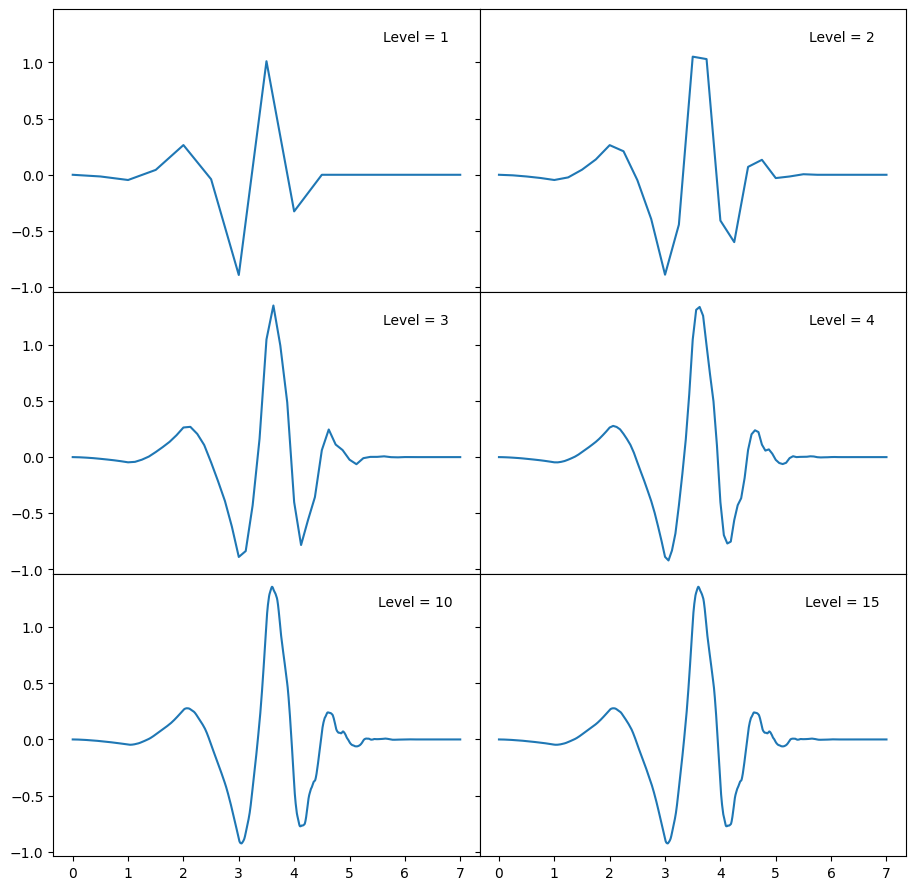

In [68]:
plot_wavelet(Wavelet('db4'))

In [67]:

from pywt import wavedec
from termcolor import colored

# number of levels we are interested in
level = 6

# transpose the data because its a time-series package
data_t = baseline_df.transpose()

# get the wavelet coefficients at each level in a list
coeffs_list = wavedec(data_t.values, wavelet='db4', level=level)

print(type(coeffs_list))
print(colored('\nExample first array', attrs=['bold', 'underline']))
coeffs_list[0]

<class 'list'>

Example first array


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


array([[17.97997644, 17.81961731, 17.97104443, 18.03590036, 17.28029777,
        19.91045225],
       [41.97997644, 41.81961731, 41.97104443, 42.03590036, 41.28029777,
        43.91045225]])

In [69]:

# make a list of the component names (later column rows)
nums = list(range(1,level+1))
names=[]
for num in nums:
    names.append('D' + str(num))
names.append('A' + str(nums[-1]))

# reverse the names so it counts down
names = names[::-1]

names

['A6', 'D6', 'D5', 'D4', 'D3', 'D2', 'D1']

In [71]:
# make an empty dataframe
wavelets = pd.DataFrame()

# for each array in the list of arrays
for i, array in enumerate(coeffs_list):
    # turn into a dataframe and transpose
    level_df = pd.DataFrame(array).T
    # name the column the appropriate level name
    level_df.columns = [names[i]]
    # if the wavelets df is empty...
    if wavelets.empty:
        # ... make the first level df the wavelets df
        wavelets = level_df
    # ..otherwise...
    else:
        # ... add the next levels df to another column
        wavelets = pd.concat([wavelets,level_df], axis=1)

wavelets.head()

ValueError: Length mismatch: Expected axis has 2 elements, new values have 1 elements

In [73]:
import re
# remove the AN levels
regex = re.compile('D')
bad_items = [x for x in list(wavelets.columns) if not regex.match(x)]
decom_wavelets = wavelets.drop(bad_items, axis=1)

decom_wavelets.head()

D6        D6        D5        D5        D4        D4        D3  \
0  41.979976  0.009308  0.009308 -0.095421 -0.095421  0.231924  0.231924   
1  41.819617 -0.015183 -0.015183 -0.363618 -0.363618  0.697237  0.697237   
2  41.971044 -0.757432 -0.757432 -0.723117 -0.723117 -0.651380 -0.651380   
3  42.035900  0.268386  0.268386  0.253029  0.253029  0.237799  0.237799   
4  41.280298  0.600298  0.600298  0.698282  0.698282  0.273758  0.273758   

         D3        D2        D2        D1  
0  0.327500  0.327500 -0.600414 -0.600414  
1  1.087562  1.087562 -1.751890 -1.751890  
2  0.143536  0.143536  0.627830  0.627830  
3 -0.046271 -0.046271 -0.245214 -0.245214  
4 -0.496298 -0.496298  1.969688  1.969688

In [74]:
from pywt import wavedec

def wavelet_decompose_channels(data, level, output=False):
  # take every x number of points using numpy's slicing (start:stop:step)
  data = data[0::2]

  data.columns.name='channel'

  # transpose the data
  data_t = data.transpose()

  # get the wavelet coefficients at each level in a list
  coeffs_list = wavedec(data_t.values, wavelet='db4', level=level)

  # make a list of the component names (later column rows)
  nums = list(range(1,level+1))
  names=[]
  for num in nums:
    names.append('D' + str(num))
  names.append('A' + str(nums[-1]))

  # reverse the names so it counts down
  names = names[::-1]

  i = 0
  wavelets = pd.DataFrame()
  for i, array in enumerate(coeffs_list):
    # turn into a dataframe and transpose
    level_df = pd.DataFrame(array)
    level_df.index = data.columns
    level_df['level'] = names[i]
    level_df= level_df.set_index('level', append=True)
    level_df=level_df.T
    # add the next levels df to another column
    wavelets = pd.concat([wavelets,level_df], axis=1, sort=True)

  # sort values along the channels
  wavelets = wavelets.sort_values(['channel', 'level'], axis=1)

  # remove the AN levels
  regex = re.compile('D')
  bad_items = [x for x in list(wavelets.columns.levels[1]) if not regex.match(x)]
  decom_wavelets = wavelets.drop(bad_items, axis=1, level = 'level')

  decom_wavelets.index.name='sample'

  if output:
    display(decom_wavelets.head())

  return decom_wavelets

example_wavelets = wavelet_decompose_channels(seiz_df, level=5, output=True)

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


channel         A                                                 B            \
level          D1        D2        D3        D4        D5        D1        D2   
sample                                                                          
0       -0.163848 -0.731572 -0.323254  0.677091 -0.009746 -0.163848 -0.731572   
1        0.163848 -2.362729 -0.823760  2.175913 -0.097089  0.163848 -2.362729   
2       -0.163848  0.731572  1.027891 -0.105481 -0.634732 -0.163848  0.731572   
3        0.163848  2.362729 -1.040175  0.053774  0.224585  0.163848  2.362729   
4             NaN -0.731572  1.159297 -0.669544  0.541341       NaN -0.731572   

channel                                
level          D3        D4        D5  
sample                                 
0       -0.323254  0.677091 -0.009746  
1       -0.823760  2.175913 -0.097089  
2        1.027891 -0.105481 -0.634732  
3       -1.040175  0.053774  0.224585  
4        1.159297 -0.669544  0.541341

In [75]:
from pywt import wavedec

def wavelet_decompose_channels(data, level, output=False):
  # take every x number of points using numpy's slicing (start:stop:step)
  data = data[0::2]

  data.columns.name='channel'

  # transpose the data
  data_t = data.transpose()

  # get the wavelet coefficients at each level in a list
  coeffs_list = wavedec(data_t.values, wavelet='db4', level=level)

  # make a list of the component names (later column rows)
  nums = list(range(1,level+1))
  names=[]
  for num in nums:
    names.append('D' + str(num))
  names.append('A' + str(nums[-1]))

  # reverse the names so it counts down
  names = names[::-1]

  i = 0
  wavelets = pd.DataFrame()
  for i, array in enumerate(coeffs_list):
    # turn into a dataframe and transpose
    level_df = pd.DataFrame(array)
    level_df.index = data.columns
    level_df['level'] = names[i]
    level_df= level_df.set_index('level', append=True)
    level_df=level_df.T
    # add the next levels df to another column
    wavelets = pd.concat([wavelets,level_df], axis=1, sort=True)

  # sort values along the channels
  wavelets = wavelets.sort_values(['channel', 'level'], axis=1)

  # remove the AN levels
  regex = re.compile('D')
  bad_items = [x for x in list(wavelets.columns.levels[1]) if not regex.match(x)]
  decom_wavelets = wavelets.drop(bad_items, axis=1, level = 'level')

  decom_wavelets.index.name='sample'

  if output:
    display(decom_wavelets.head())

  return decom_wavelets

example_wavelets = wavelet_decompose_channels(seiz_df, level=5, output=True)

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


channel         A                                                 B            \
level          D1        D2        D3        D4        D5        D1        D2   
sample                                                                          
0       -0.163848 -0.731572 -0.323254  0.677091 -0.009746 -0.163848 -0.731572   
1        0.163848 -2.362729 -0.823760  2.175913 -0.097089  0.163848 -2.362729   
2       -0.163848  0.731572  1.027891 -0.105481 -0.634732 -0.163848  0.731572   
3        0.163848  2.362729 -1.040175  0.053774  0.224585  0.163848  2.362729   
4             NaN -0.731572  1.159297 -0.669544  0.541341       NaN -0.731572   

channel                                
level          D3        D4        D5  
sample                                 
0       -0.323254  0.677091 -0.009746  
1       -0.823760  2.175913 -0.097089  
2        1.027891 -0.105481 -0.634732  
3       -1.040175  0.053774  0.224585  
4        1.159297 -0.669544  0.541341

In [58]:
import pandas as pd
from pywt import wavedec
import numpy as np

def minus_small(x):
    '''Takes a pandas series and subtracts the smallest number (other than 0)
    '''
    # drop 0s
    no_zeros = x[x!=0]
    # subtract the minimum value
    result = no_zeros - no_zeros.min()
    return result

def reformat(data, feature_name):
    data.index = [feature_name+level for level in data.index]
    data.index.name = 'feature'
    data = pd.DataFrame(data.unstack()).T

    return data

def log_sum_channels(data, output=False):
    absolute_sums = data.sum()
    # make the columns channels
    absolute_sums = absolute_sums.unstack('channel')
    # for each channel apply the minus small function
    absolute_sums_minus = absolute_sums.apply(minus_small) # Now using the defined 'minus_small' function
    # find the log of each channel
    absolute_sums_log = absolute_sums_minus.apply(np.log)
    # reformat the df for later combination with other features
    absolute_sums_log = reformat(absolute_sums_log, 'LSWT_')

    if output:
        display(absolute_sums_log.head())

    return absolute_sums_log

# Assuming 'example_wavelets' is already defined from previous code
example_absolute_sums_log = log_sum_channels(example_wavelets, output=True)

channel        A                                           B                   \
feature  LSWT_D1 LSWT_D2  LSWT_D3  LSWT_D4  LSWT_D5  LSWT_D1 LSWT_D2  LSWT_D3   
0       -0.31256    -inf -0.89571 -0.31256 -0.31256 -0.31256    -inf -0.89571   

channel                   
feature LSWT_D4  LSWT_D5  
0           NaN -0.31256

In [95]:
from pywt import wavedec

def ave(data, output=False):
    # get the mean
    mean_data = data.mean()

    # Convert the MultiIndex to a simple Index before adding '_mean'
    mean_data.index = [str(level) + '_mean' for level in mean_data.index]

    if output:
        display(mean_data)

    return mean_data

print(color.BOLD+color.UNDERLINE+'Baseline Mean Wavelets'+color.END)
baseline_mean = ave(baseline_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Mean Wavelets'+color.END)

# Call wavelet_decompose_channels to create seizure_wavelets
seizure_wavelets = wavelet_decompose_channels(seiz_df, level=5) # Assuming seiz_df is defined somewhere

seizure_mean = ave(seizure_wavelets, output=True)

Baseline Mean Wavelets


Series([], dtype: float64)


Seizure Mean Wavelets


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


('A', 'D1')_mean    1.387779e-17
('A', 'D2')_mean   -1.463143e-01
('A', 'D3')_mean   -5.387565e-02
('A', 'D4')_mean   -2.220446e-16
('A', 'D5')_mean   -9.251859e-18
('B', 'D1')_mean    2.775558e-17
('B', 'D2')_mean   -1.463143e-01
('B', 'D3')_mean   -5.387565e-02
('B', 'D4')_mean    0.000000e+00
('B', 'D5')_mean    4.810966e-16
dtype: float64

In [96]:
def ratio(data, output=False):
    # get the mean of the absolute values
    data = data.abs().mean()
    # get a list of the index
    decimation_levels = list(data.index)

    ratio_data=pd.Series(index=data.index)
    for level_no in range(0, len(decimation_levels)):
        # for the first decimation
        if level_no == 0:
            ratio_data.loc[decimation_levels[level_no]] = \
            data.loc[decimation_levels[level_no]]/data.loc[decimation_levels[level_no+1]]

        #for the last decimation
        elif level_no == len(decimation_levels)-1:
            ratio_data.loc[decimation_levels[level_no]] = \
            data.loc[decimation_levels[level_no]]/data.loc[decimation_levels[level_no-1]]
        else:
            before = data.loc[decimation_levels[level_no-1]]
            after = data.loc[decimation_levels[level_no+1]]
            mean_data = (before+after)/2

            ratio_data.loc[decimation_levels[level_no]] = \
            data.loc[decimation_levels[level_no]]/mean_data

    ratio_data.index += '_Ratio'

    if output:
        display(ratio_data)

    return ratio_data


print(color.BOLD+color.UNDERLINE+'Baseline Ratio Wavelets'+color.END)
baseline_ratio = ratio(baseline_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Ratio Wavelets'+color.END)
seizure_ratio = ratio(seizure_wavelets, output=True)

Baseline Ratio Wavelets


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int64'), dtype('<U6')) -> None

In [97]:
import os                         # for file locations
import matplotlib.pyplot as plt   # for plotting
import numpy as np                # arrays
import pickle                     # saving python objects
import pandas as pd               # dataframes

RANDOM_STATE = 0

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [98]:
import gdown
FILE_PATH = 'Epil_features.json.gzip'

if not os.path.exists(FILE_PATH):
    gdown.download('https://drive.google.com/uc?id=143dJfY1_U-p8elbvSzwe0TTHGcDo3PYv',
                './'+FILE_PATH, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=143dJfY1_U-p8elbvSzwe0TTHGcDo3PYv
To: /content/Epil_features.json.gzip
100%|██████████| 151k/151k [00:00<00:00, 46.1MB/s]


In [99]:
import numpy as np
import pickle           # saving python objects
import pandas as pd     # dataframes

# load features dataframe
feature_df = pd.read_json(FILE_PATH, orient='index', compression = 'gzip')

# display examples of the data
display(feature_df.info())
display(feature_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 500 non-null    object 
 1   location              500 non-null    object 
 2   file_id               500 non-null    object 
 3   CZ|2_4Hz              500 non-null    float64
 4   CZ|4_8Hz              500 non-null    float64
 5   CZ|8_12Hz             500 non-null    float64
 6   CZ|12_30Hz            500 non-null    float64
 7   CZ|30_70Hz            500 non-null    float64
 8   CZ|Ratio_3_12/2_30Hz  500 non-null    float64
 9   CZ|D6_mean            500 non-null    float64
 10  CZ|D5_mean            500 non-null    float64
 11  CZ|D4_mean            500 non-null    float64
 12  CZ|D3_mean            500 non-null    float64
 13  CZ|D2_mean            500 non-null    float64
 14  CZ|D1_mean            500 non-null    float64
 15  CZ|D6_std             500 no

None

class                         location file_id     CZ|2_4Hz    CZ|4_8Hz  \
0  baseline  intracranial epileptogenic zone    F001    77.429564   28.734279   
1  baseline  intracranial epileptogenic zone    F002  1060.585071  480.018796   
2  baseline  intracranial epileptogenic zone    F003   316.076591  186.372298   
3  baseline  intracranial epileptogenic zone    F004   213.966621   91.338657   
4  baseline  intracranial epileptogenic zone    F005   973.296659  385.347164   

    CZ|8_12Hz  CZ|12_30Hz  CZ|30_70Hz  CZ|Ratio_3_12/2_30Hz  CZ|D6_mean  ...  \
0   13.102026    2.467909    0.462172              0.138219   -1.758529  ...   
1  201.886582   29.713494    4.070126              0.140057  -43.528777  ...   
2  135.970946   20.841888    2.781560              0.148809    7.140095  ...   
3   34.191639    3.157286    0.573759              0.064002  -15.857898  ...   
4  218.880920   47.891201    7.560384              0.183348  -21.433089  ...   

   CZ|D4_mean_abs  CZ|D3_mean_abs  CZ|D2_mean_abs  CZ|D1_mean_abs  CZ|D6_LSWT  \
0       28.409123       14.772764        5.266416        1.910710    0.000000   
1       81.999218       31.116812        8.462824        1.761159    0.000000   
2       87.018413       39.403208       10.376156        2.179047    7.534104   
3       45.580184       17.377872        4.953816        1.812019    0.000000   
4      113.995056       52.705751       17.566081        3.478807    8.055723   

   CZ|D5_LSWT  CZ|D4_LSWT  CZ|D3_LSWT  CZ|D2_LSWT  CZ|D1_LSWT  
0    6.427250    5.613190    5.805773    4.749819    3.665018  
1    8.241056    7.388935    7.770027    8.062119    8.020356  
2    0.000000    7.412203    6.336933    7.197397    7.170449  
3    6.422032    7.582963    6.947882    7.086014    6.950912  
4    0.000000    8.726303    8.031105    8.460379    8.480473  

[5 rows x 39 columns]

In [100]:

feature_df['location'].unique()

array(['intracranial epileptogenic zone', 'intracranial hippocampus',
       'surface'], dtype=object)

In [101]:

# select only intracranial EEG
feature_reduced = feature_df[feature_df.location != 'surface']
feature_reduced['location'].unique()

array(['intracranial epileptogenic zone', 'intracranial hippocampus'],
      dtype=object)

In [102]:
import sklearn
sklearn.__version__

'1.2.2'

In [103]:

feature_df_drop = feature_df.drop(['class', 'file_id', 'location'], axis='columns')
data_x = feature_df_drop.values

data_x


array([[  77.42956361,   28.73427904,   13.10202554, ...,    5.80577268,
           4.74981903,    3.66501809],
       [1060.58507118,  480.01879575,  201.886582  , ...,    7.77002745,
           8.0621192 ,    8.02035555],
       [ 316.07659124,  186.37229784,  135.97094565, ...,    6.33693273,
           7.19739712,    7.17044911],
       ...,
       [  81.55428714,   49.70403992,   75.17451777, ...,    6.57245791,
           5.42744447,    6.1220055 ],
       [  89.63214378,   96.72602516,   93.09894163, ...,    0.        ,
           5.31796381,    4.56826703],
       [ 111.93187763,   61.40272274,   76.48485277, ...,    0.        ,
           5.6456761 ,    6.2556254 ]])

In [104]:
display(feature_df['class'].value_counts())

class
baseline    400
seizure     100
Name: count, dtype: int64

In [105]:
from sklearn.preprocessing import LabelEncoder

# create condition(group) array
class_series = feature_df['class']

# make a label encoder
le = LabelEncoder()
# change the string labels to ints
data_y = le.fit_transform(class_series)

# get the unique labels
labels = list(class_series.unique())
# print out the labels and their new codes
for i, code in enumerate(list(le.transform(labels))):
    print(labels[i] + ': ' + str(code))

data_y[:5]

baseline: 0
seizure: 1


array([0, 0, 0, 0, 0])

In [106]:

feature_df['location'].value_counts()

location
intracranial epileptogenic zone    200
surface                            200
intracranial hippocampus           100
Name: count, dtype: int64

In [107]:
from sklearn.preprocessing import LabelBinarizer

# create condition(group) array
location_series = feature_df['location']

# make a label encoder
lb = LabelBinarizer()
# change the string labels to ints
data_y = lb.fit_transform(location_series)

# get the unique labels
labels = list(location_series.unique())
# print out the labels and their new codes
for i, code in enumerate(list(lb.transform(labels))):
    print(labels[i] + ': ' + str(code))

data_y[:5]

intracranial epileptogenic zone: [1 0 0]
intracranial hippocampus: [0 1 0]
surface: [0 0 1]


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [109]:
from sklearn.preprocessing import LabelBinarizer

one_hot_y = pd.get_dummies(location_series.unique())
dummy_y = pd.get_dummies(location_series.unique(), drop_first=True)

print(color.BOLD+color.UNDERLINE+'Onehot'+color.END)
display(one_hot_y.head())
print(color.BOLD+color.UNDERLINE+'Dummy'+color.END)
display(dummy_y.head())

Onehot


intracranial epileptogenic zone  intracranial hippocampus  surface
0                             True                     False    False
1                            False                      True    False
2                            False                     False     True

Dummy


intracranial hippocampus  surface
0                     False    False
1                      True    False
2                     False     True

In [110]:
# select only intracranial EEG
feature_reduced = feature_df[feature_df.location != 'surface']
# drop the columns which are not feature variables
feature_reduced_drop = feature_reduced.drop(['class', 'file_id', 'location'], axis='columns')
# change to an array
data_x = feature_reduced_drop.values
# change the string labels to ints
data_y = le.fit_transform(feature_reduced['class'])

print(color.BOLD+'Feature DataFrame'+color.END)
display(data_x.shape)
print(color.BOLD+'Target DataFrame'+color.END)
display(data_y.shape)

Feature DataFrame


(300, 36)

Target DataFrame


(300,)

In [111]:
from sklearn.model_selection import train_test_split
TEST_SIZE = 0.1

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=TEST_SIZE,
                                                  random_state=RANDOM_STATE)

print(color.BOLD+color.UNDERLINE+'Feature DataFrame'+color.END)
print('Training size: ' + str(X_train.shape))
print('Validation size: ' + str(X_val.shape))
print('Test size: ' + str(X_test.shape))
print(color.BOLD+color.UNDERLINE+'\nTarget DataFrame'+color.END)
print('Training size: ' + str(y_train.shape))
print('Validation size: ' + str(y_val.shape))
print('Test size: ' + str(y_test.shape))

Feature DataFrame
Training size: (243, 36)
Validation size: (27, 36)
Test size: (30, 36)

Target DataFrame
Training size: (243,)
Validation size: (27,)
Test size: (30,)


In [112]:
def get_proportions(data):

    counts = pd.DataFrame(np.unique(data, return_counts=True), index = ['Class_ID', 'Counts']).T
    counts['Percent'] = (counts['Counts']/counts['Counts'].sum()).round(2)*100
    counts = counts.set_index('Class_ID')
    return counts


print(color.BOLD+color.UNDERLINE+'Training DataFrame'+color.END)
display(get_proportions(y_train))
print(color.BOLD+color.UNDERLINE+'\nTest DataFrame'+color.END)
display(get_proportions(y_test))

Training DataFrame


Counts  Percent
Class_ID                 
0            169     70.0
1             74     30.0


Test DataFrame


Counts  Percent
Class_ID                 
0             17     57.0
1             13     43.0

In [113]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)

In [114]:

feature_list = list(feature_reduced_drop.columns)
feature_list

['CZ|2_4Hz',
 'CZ|4_8Hz',
 'CZ|8_12Hz',
 'CZ|12_30Hz',
 'CZ|30_70Hz',
 'CZ|Ratio_3_12/2_30Hz',
 'CZ|D6_mean',
 'CZ|D5_mean',
 'CZ|D4_mean',
 'CZ|D3_mean',
 'CZ|D2_mean',
 'CZ|D1_mean',
 'CZ|D6_std',
 'CZ|D5_std',
 'CZ|D4_std',
 'CZ|D3_std',
 'CZ|D2_std',
 'CZ|D1_std',
 'CZ|D6_ratio',
 'CZ|D5_ratio',
 'CZ|D4_ratio',
 'CZ|D3_ratio',
 'CZ|D2_ratio',
 'CZ|D1_ratio',
 'CZ|D6_mean_abs',
 'CZ|D5_mean_abs',
 'CZ|D4_mean_abs',
 'CZ|D3_mean_abs',
 'CZ|D2_mean_abs',
 'CZ|D1_mean_abs',
 'CZ|D6_LSWT',
 'CZ|D5_LSWT',
 'CZ|D4_LSWT',
 'CZ|D3_LSWT',
 'CZ|D2_LSWT',
 'CZ|D1_LSWT']

In [115]:

x_axis_label = 'CZ|D1_ratio'
y_axis_label = 'CZ|D2_ratio'

reduced_array = X_train_scale[:,[feature_list.index(x_axis_label),feature_list.index(y_axis_label)]]
reduced_df = pd.DataFrame(reduced_array, columns=[x_axis_label, y_axis_label])

reduced_df.head()

CZ|D1_ratio  CZ|D2_ratio
0     0.614533     0.007356
1    -1.367899    -0.728042
2     1.384150     0.588297
3     0.754261     0.142999
4     0.308568     0.976768

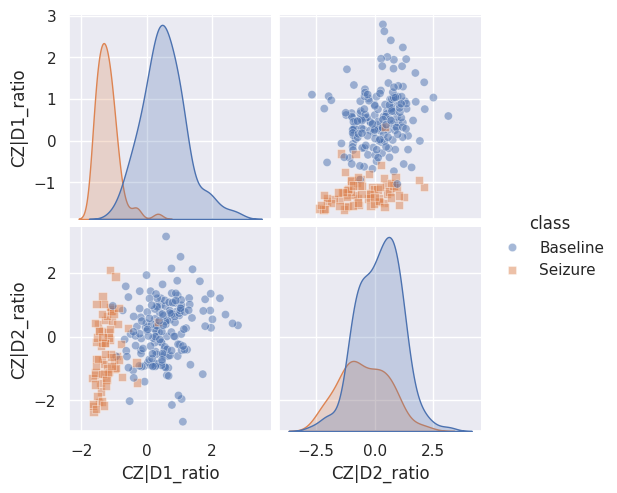

In [116]:
import seaborn as sns; sns.set(color_codes=True)

def plot_pairplot(data_x, data_y):

    data_plot = data_x.copy()
    data_plot['class'] = np.vectorize({0:'Baseline', 1:'Seizure'}.get)(data_y)
    sns.pairplot(data_plot,
                 hue = 'class',
                 hue_order = ['Baseline','Seizure'],
                 markers=["o", "s"],
                 plot_kws=dict(alpha = 0.5))
    plt.show()

plot_pairplot(reduced_df, y_train)

Before Resample
Counter({0: 169, 1: 74})


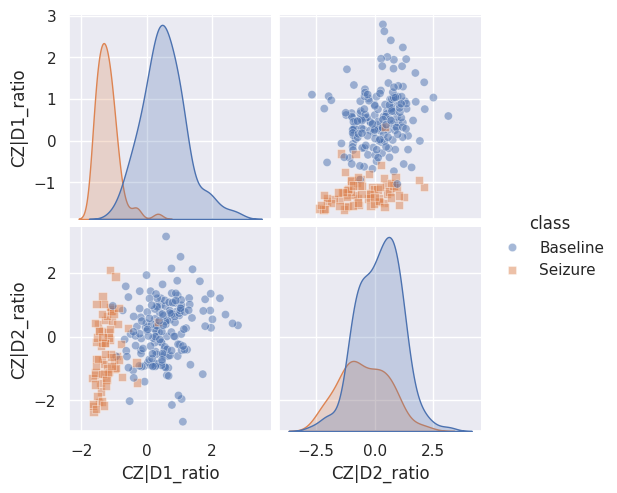

After Resample
Counter({1: 74, 0: 74})


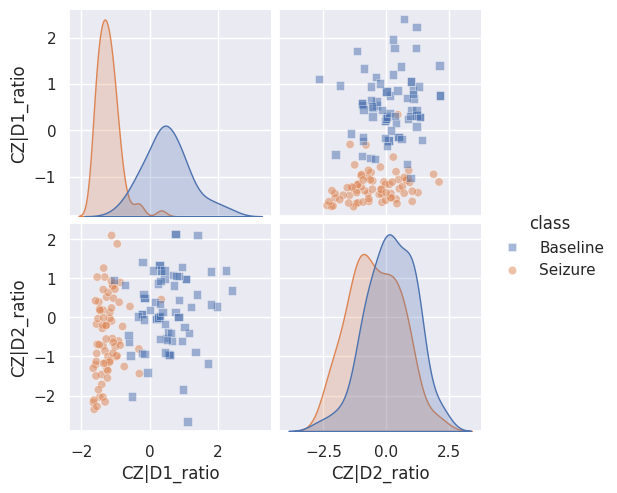

In [117]:
from sklearn.utils import resample
from collections import Counter

print(color.UNDERLINE + 'Before Resample' + color.END)
print(Counter(y_train))
plot_pairplot(reduced_df, y_train)

print(color.UNDERLINE + 'After Resample' + color.END)
data_x_downsampled, data_y_downsampled = resample(reduced_df[y_train == 0],
                                                  y_train[y_train == 0],
                                                  replace=True,
                                                  n_samples=reduced_df[y_train == 1].shape[0],
                                                  random_state=123)

data_x_bal = np.vstack((reduced_df[y_train == 1], data_x_downsampled))
data_y_bal = np.hstack((y_train[y_train == 1], data_y_downsampled))
print(Counter(data_y_bal))

plot_pairplot(pd.DataFrame(data_x_bal, columns = reduced_df.columns),
              pd.DataFrame(data_y_bal))

Before Resample
Counter({0: 169, 1: 74})


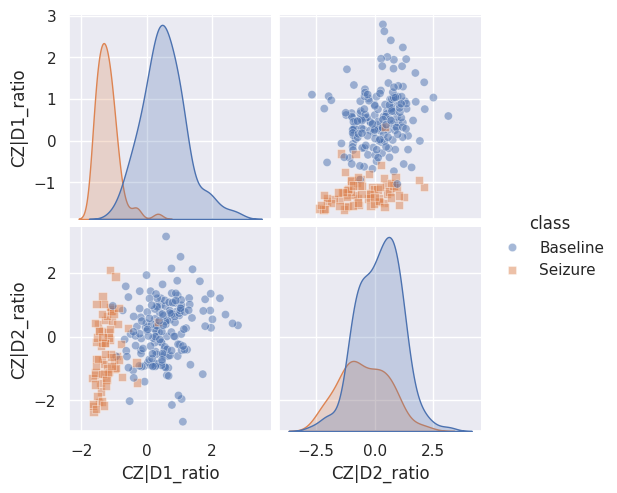

After Resample
Counter({0: 74, 1: 74})


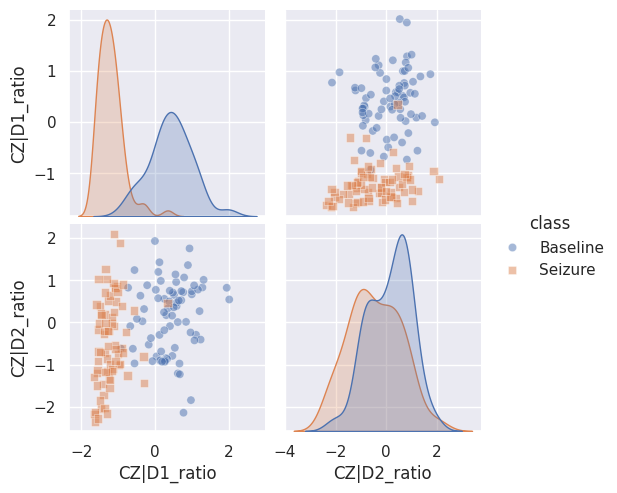

In [118]:

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

def imblearn_sample(sampler, data_x, data_y):

    print(color.UNDERLINE + 'Before Resample' + color.END)
    print(Counter(data_y))
    plot_pairplot(data_x, data_y)

    print(color.UNDERLINE + 'After Resample' + color.END)
    data_x_downsampled, data_y_downsampled = sampler.fit_resample(data_x,
                                                                data_y)
    print(Counter(data_y_downsampled))

    plot_pairplot(pd.DataFrame(data_x_downsampled, columns = data_x.columns),
                  pd.DataFrame(data_y_downsampled))

imblearn_sample(RandomUnderSampler(random_state=123), reduced_df, y_train)

Before Resample
Counter({0: 169, 1: 74})


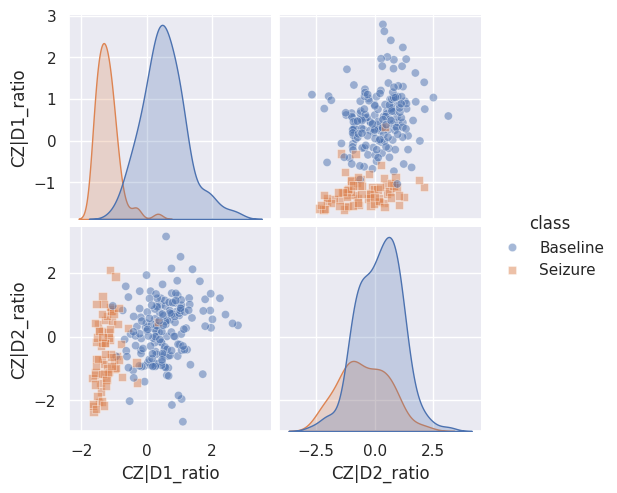

After Resample
Counter({0: 74, 1: 74})


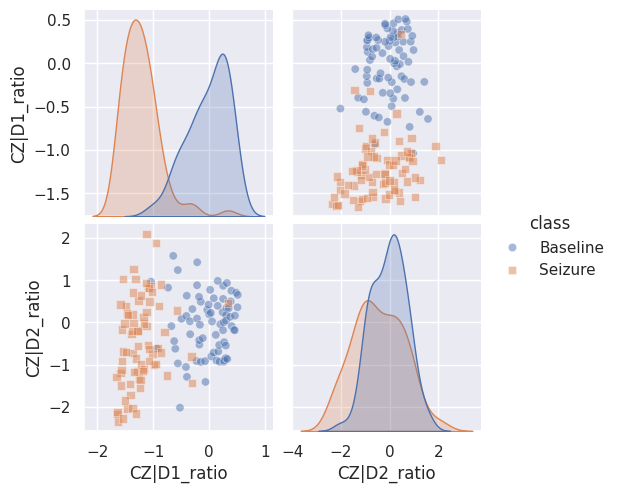

In [120]:
from imblearn.under_sampling import NearMiss

imblearn_sample(NearMiss(), reduced_df, y_train) # Remove random_state argument

Before Resample
Counter({0: 169, 1: 74})


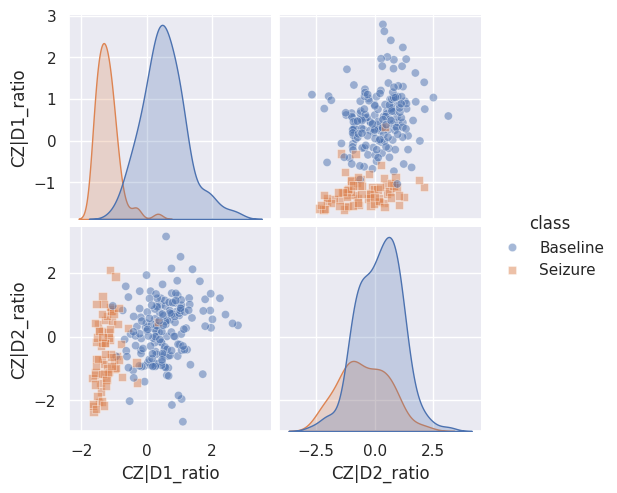

After Resample
Counter({0: 149, 1: 74})


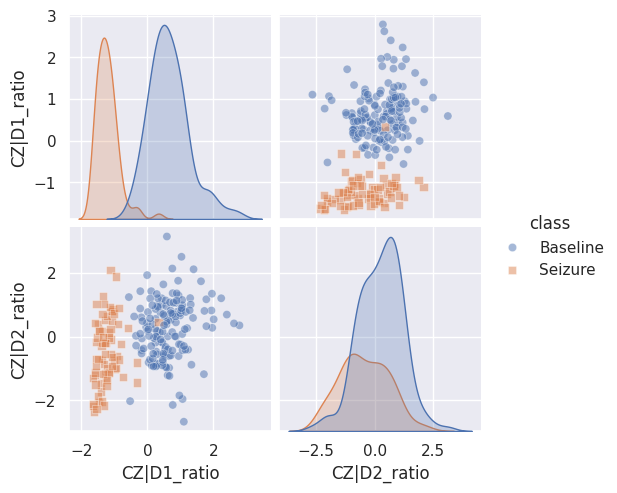

In [122]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

# Remove random_state argument
imblearn_sample(NeighbourhoodCleaningRule(), reduced_df, y_train)


SMOTE
Before Resample
Counter({0: 169, 1: 74})


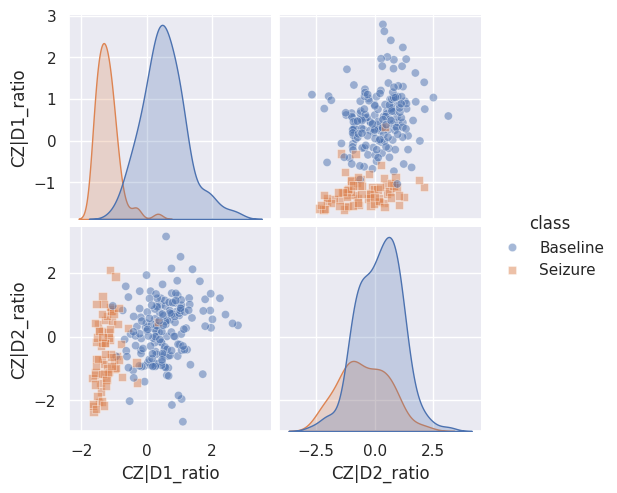

After Resample
Counter({0: 169, 1: 169})


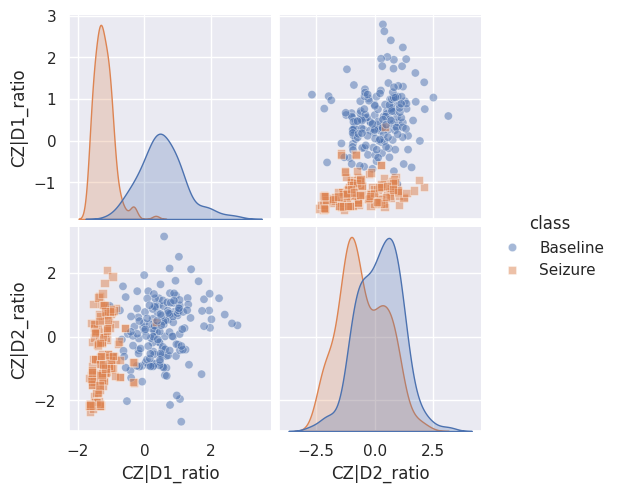

ADASYN
Before Resample
Counter({0: 169, 1: 74})


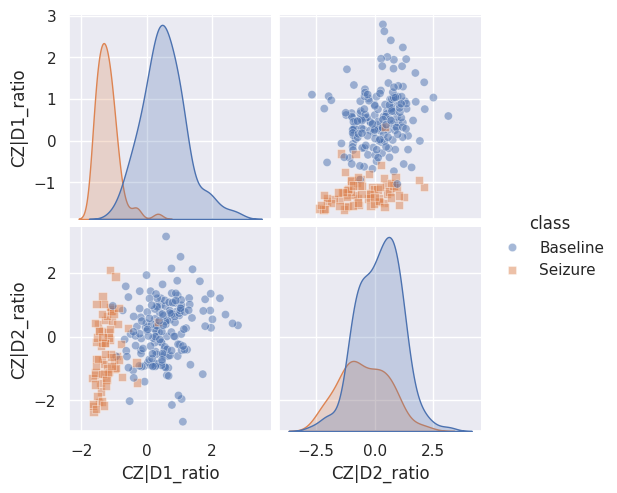

After Resample
Counter({0: 169, 1: 167})


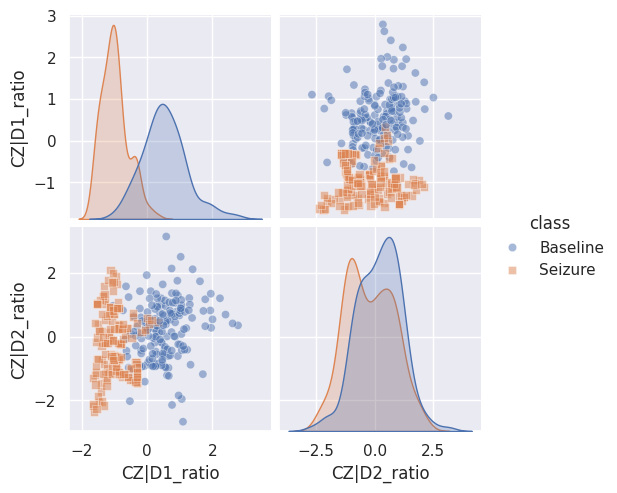

SMOTE with Edited Nearest Neighbor
Before Resample
Counter({0: 169, 1: 74})


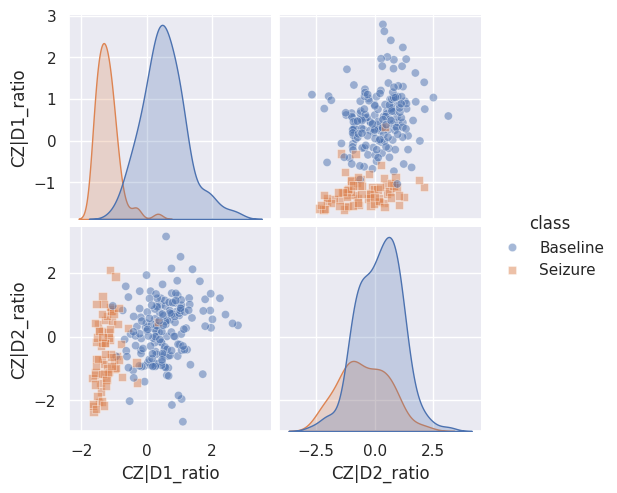

After Resample
Counter({0: 151, 1: 148})


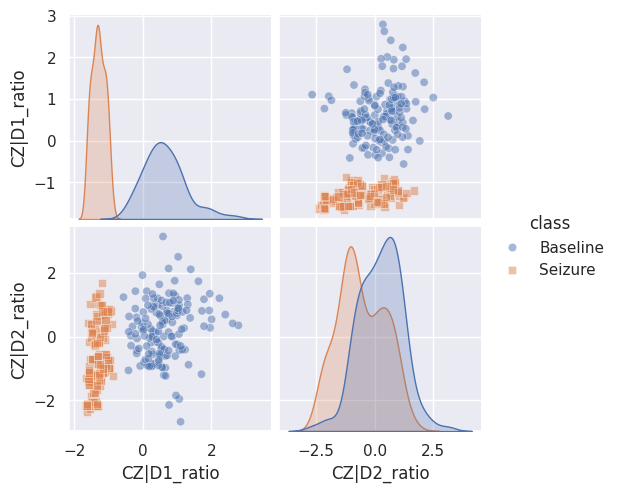

SMOTE with Tomek links
Before Resample
Counter({0: 169, 1: 74})


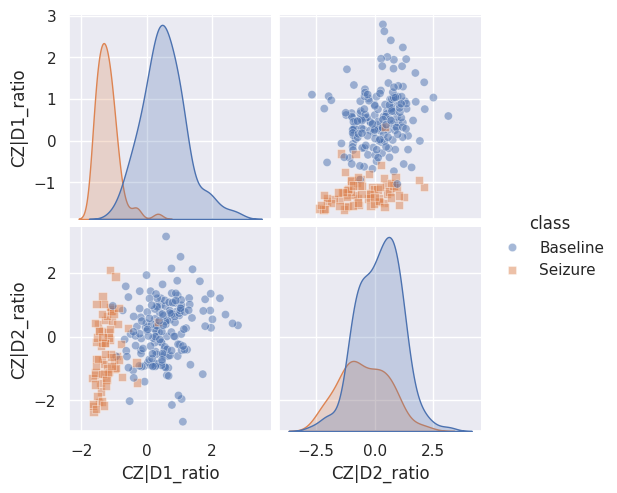

After Resample
Counter({0: 166, 1: 166})


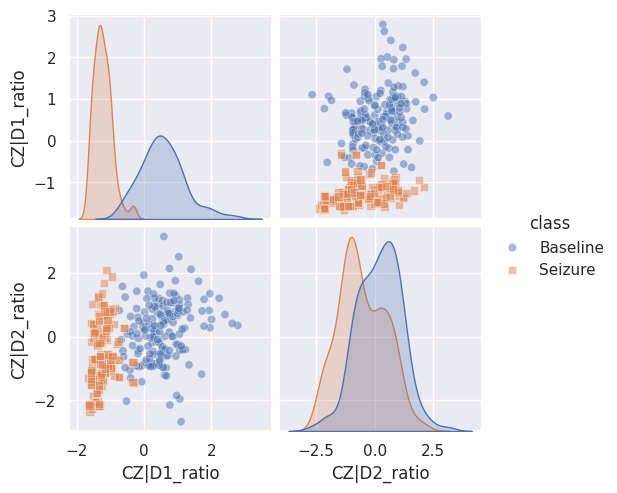

In [123]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

print(color.BOLD+color.UNDERLINE+'SMOTE'+color.END)
imblearn_sample(SMOTE(random_state=123), reduced_df, y_train)
print(color.BOLD+color.UNDERLINE+'ADASYN'+color.END)
imblearn_sample(ADASYN(random_state=123), reduced_df, y_train)
print(color.BOLD+color.UNDERLINE+'SMOTE with Edited Nearest Neighbor'+color.END)
imblearn_sample(SMOTEENN(random_state=123), reduced_df, y_train)
print(color.BOLD+color.UNDERLINE+'SMOTE with Tomek links'+color.END)
imblearn_sample(SMOTETomek(random_state=123), reduced_df, y_train)


In [124]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(C=100.,
                         solver='liblinear',
                         random_state=RANDOM_STATE)

reg.fit(X_train_scale, y_train)

LogisticRegression(C=100.0, random_state=0, solver='liblinear')

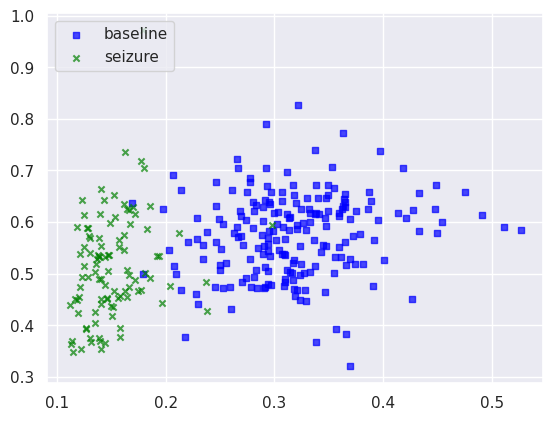

In [125]:
from mlxtend.plotting import category_scatter

x_axis_label = 'CZ|D1_ratio'
y_axis_label = 'CZ|D2_ratio'

fig = category_scatter(x=x_axis_label, y=y_axis_label, label_col='class',
                       data=feature_reduced, legend_loc='upper left')

feature_list = list(feature_reduced_drop.columns)
vis_data = X_train_scale[:,[feature_list.index(x_axis_label),
                          feature_list.index(y_axis_label)]]

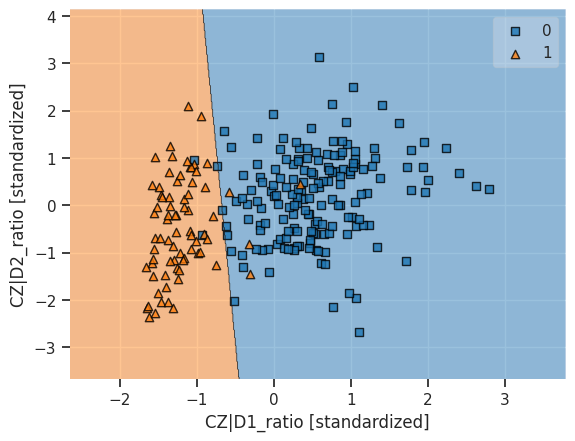

In [126]:
from mlxtend.plotting import plot_decision_regions

reg.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = reg)

plt.xlabel(x_axis_label + ' [standardized]')
plt.ylabel(y_axis_label + ' [standardized]')
plt.show()

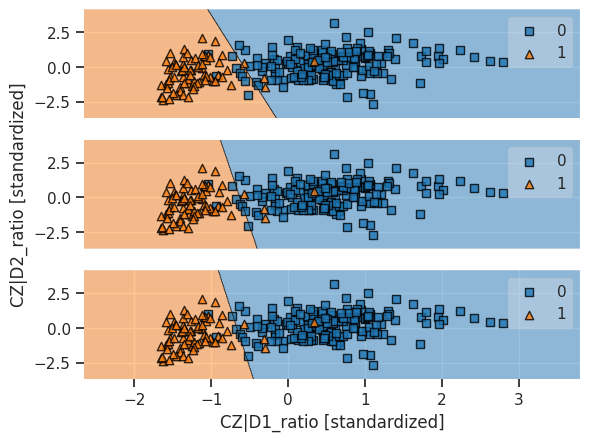

In [127]:
fig, axes = plt.subplots(3, 1, sharex=True, sharey=True)

for i, c in enumerate([0.1, 1, 10]):
    reg = LogisticRegression(C=c, solver='liblinear',random_state=RANDOM_STATE)

    reg.fit(vis_data, y_train)

    plot_decision_regions(vis_data,
                          y_train,
                          clf = reg,
                          ax = axes[i])
    axes[i].get_xaxis().set_visible(False)

axes[2].get_xaxis().set_visible(True)
plt.xlabel(x_axis_label + ' [standardized]')
axes[1].set_ylabel(y_axis_label + ' [standardized]')
plt.savefig('log_change_reg.png')
plt.show()

In [128]:
from sklearn.pipeline import Pipeline

pipe_reg = Pipeline([('scl', StandardScaler()),
                     ('clf', LogisticRegression(C=100,
                                                solver='liblinear',
                                                class_weight='balanced',
                                                random_state=RANDOM_STATE))])

pipe_reg

Pipeline(steps=[('scl', StandardScaler()),
                ('clf',
                 LogisticRegression(C=100, class_weight='balanced',
                                    random_state=0, solver='liblinear'))])

In [129]:
pipe_reg.fit(X_train, y_train)
print('Validation Accuracy: %.3f' % pipe_reg.score(X_val, y_val))

Validation Accuracy: 1.000


In [130]:
log_predicted = pipe_reg.predict(X_val)
log_predicted

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0])

In [131]:
y_val

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0])

In [132]:
from sklearn.svm import SVC

pipe_svc_linear = Pipeline([('scl', StandardScaler()),
                            ('clf', SVC(C=100,
                                        kernel='linear',
                                        class_weight = 'balanced',
                                        random_state=RANDOM_STATE))])

pipe_svc_linear

Pipeline(steps=[('scl', StandardScaler()),
                ('clf',
                 SVC(C=100, class_weight='balanced', kernel='linear',
                     random_state=0))])

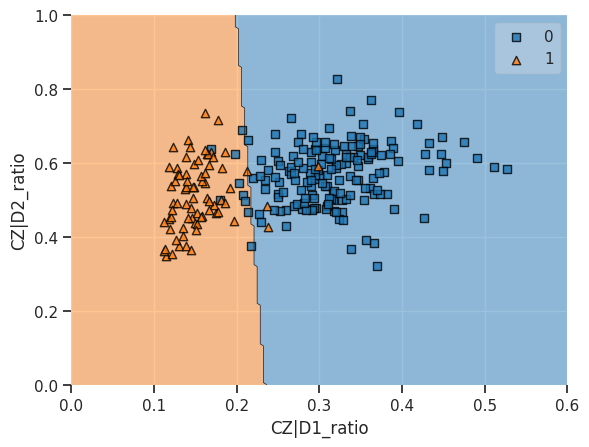

In [133]:
from mlxtend.plotting import plot_decision_regions

vis_data = X_train[:,[feature_list.index(x_axis_label),
                      feature_list.index(y_axis_label)]]

pipe_svc_linear.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = pipe_svc_linear)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)

plt.savefig('svm_linear_boundary.png')
plt.show()


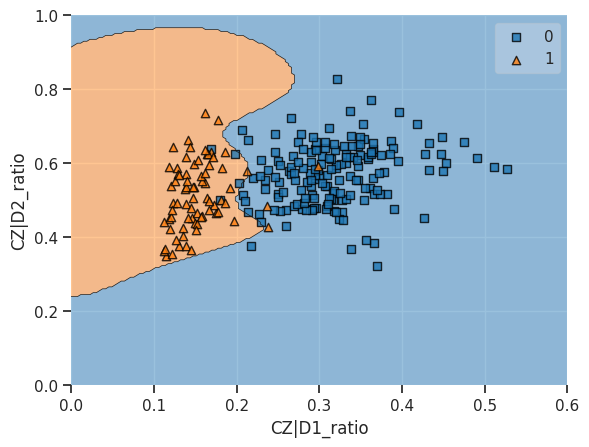

In [134]:
pipe_svc_rbf = Pipeline([('scl', StandardScaler()),
                         ('clf', SVC(C=100,
                                     kernel='rbf',
                                     class_weight = 'balanced',
                                     random_state=RANDOM_STATE))])

pipe_svc_rbf.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = pipe_svc_rbf)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)

plt.savefig('svm_rbf_boundary.png')
plt.show()

In [135]:
pipe_svc_rbf.fit(X_train, y_train)
print('Validation Accuracy: %.3f' % pipe_svc_rbf.score(X_val, y_val))

Validation Accuracy: 1.000


In [136]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = 1,
                            random_state=RANDOM_STATE)

DT

DecisionTreeClassifier(max_depth=1, random_state=0)

In [137]:
!pip install graphviz

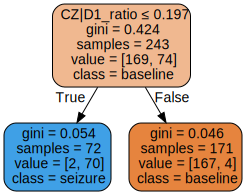

In [138]:

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
import graphviz

DT.fit(vis_data, y_train)
dot_data = export_graphviz(DT, out_file=None,
                     feature_names=[x_axis_label, y_axis_label],
                     class_names=feature_reduced['class'].unique(),
                     filled=True, rounded=True,
                     special_characters=True)

# Save it
graph = graph_from_dot_data(dot_data)
graph.write_png('binary_split.png')

# Show it
graphviz.Source(dot_data)

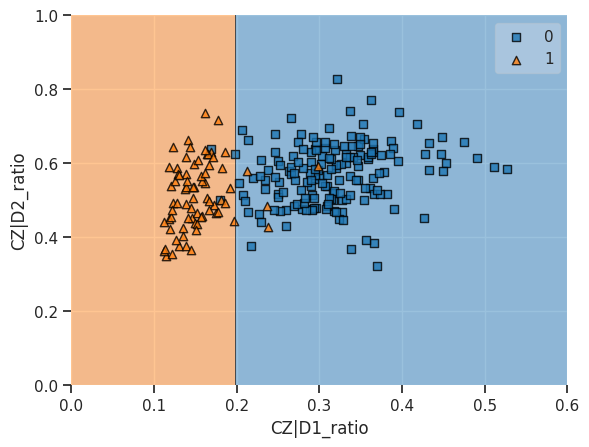

In [139]:
plot_decision_regions(vis_data,
                      y_train,
                      clf = DT)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

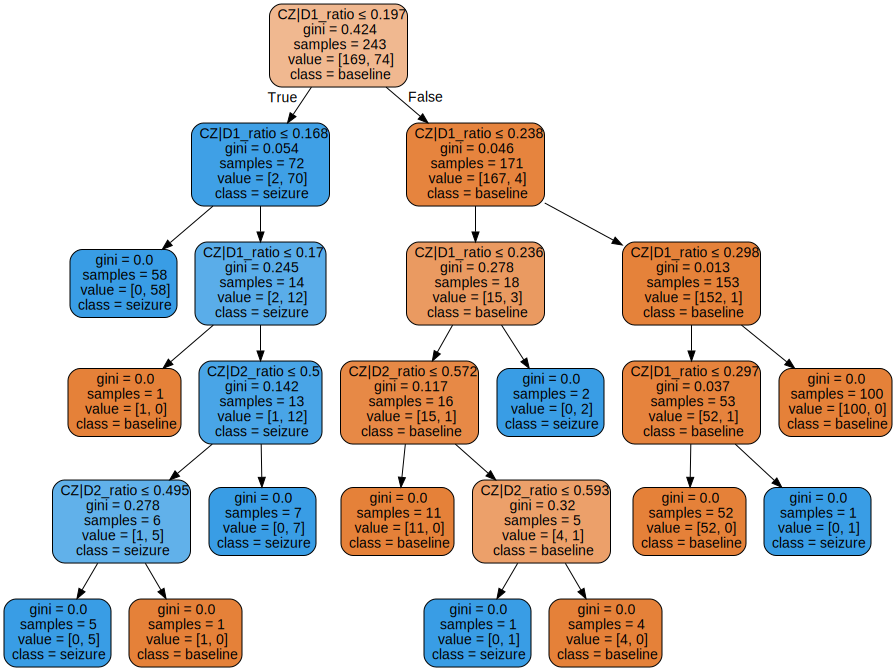

In [140]:
DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = None,
                            random_state=RANDOM_STATE)
DT.fit(vis_data, y_train)

dot_data = export_graphviz(DT, out_file=None,
                     feature_names=[x_axis_label, y_axis_label],
                     class_names=feature_reduced['class'].unique(),
                     filled=True, rounded=True,
                     special_characters=True)

# Save it
graph = graph_from_dot_data(dot_data)
graph.write_png('multi_split.png')

# Show it
graphviz.Source(dot_data)

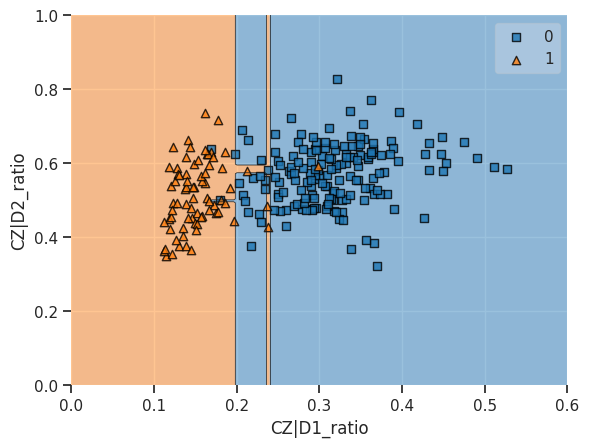

In [141]:

plot_decision_regions(vis_data,
                      y_train,
                      clf = DT)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

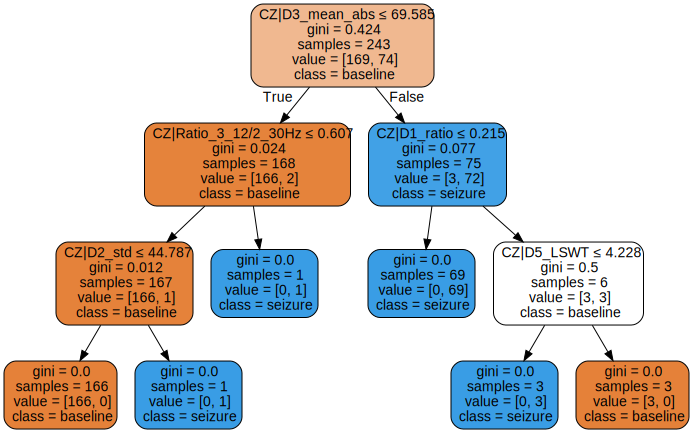

In [142]:
DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = None,
                            random_state=RANDOM_STATE)
DT.fit(X_train, y_train)

dot_data = export_graphviz(DT, out_file=None,
                     feature_names=feature_reduced_drop.columns,
                     class_names=feature_reduced['class'].unique(),
                     filled=True, rounded=True,
                     special_characters=True)

graphviz.Source(dot_data)

In [143]:
print('Validation Accuracy: %.3f' % DT.score(X_val, y_val))

Validation Accuracy: 1.000


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


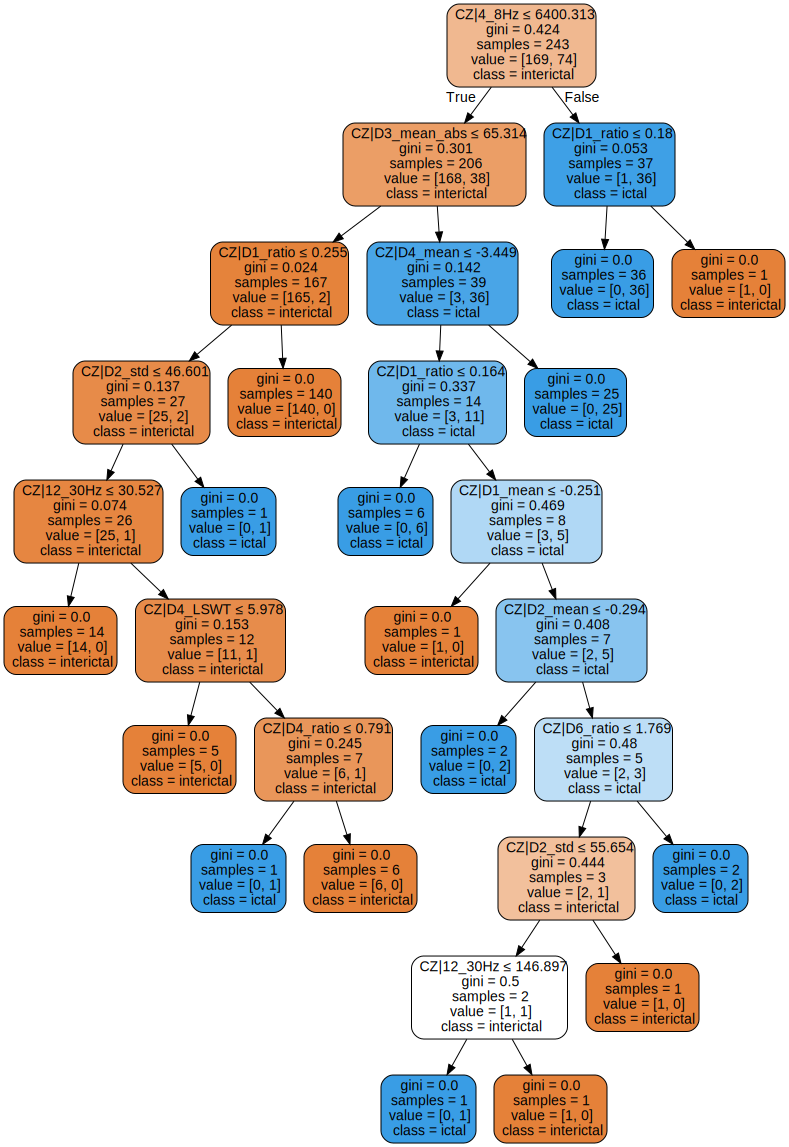

In [144]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

tree = ExtraTreeClassifier(criterion='gini',
                              random_state=RANDOM_STATE,
                              max_depth = None,
                              max_features='auto')

tree.fit(X_train, y_train)
dot_data = export_graphviz(tree, out_file=None,
                     feature_names=list(feature_reduced_drop.columns),
                     class_names=['interictal', 'ictal'],
                     filled=True, rounded=True,
                     special_characters=True)

graphviz.Source(dot_data)